In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm ###função do python para calcular os harmônicos

In [2]:
def valores():
    l = -1
    m = 0
    while l < 0 or not (-l <= m <= l):
        l = int(input("Digite o valor de l:"))
        if l < 0:
            continue     
        m = int(input("Digite o valor de m:"))
        if not (-l <= m <= l):
            continue
    print(f"l = {l}")
    print(f"m = {m}")
    return l, m

In [3]:
l, m = valores()

l = 3
m = 1


In [4]:
phi = np.linspace(0, 2 * np.pi, 100) #phi varia de 0 a 2pi
teta = np.linspace(0, np.pi, 100) #teta varia de 0 a pi 

teta, phi = np.meshgrid(teta, phi)

In [5]:
Y_l_m = sph_harm(m, l, phi, teta) ###calcular os harmonicos baseado nos valores de l e m

print(Y_l_m)

[[ 0.        +0.00000000e+00j -0.04096375+0.00000000e+00j
  -0.08157715+0.00000000e+00j ... -0.08157715+0.00000000e+00j
  -0.04096375+0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04088127-2.59808139e-03j
  -0.08141291-5.17394283e-03j ... -0.08141291-5.17394283e-03j
  -0.04088127-2.59808139e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04063419-5.18570122e-03j
  -0.08092085-1.03270520e-02j ... -0.08092085-1.03270520e-02j
  -0.04063419-5.18570122e-03j  0.        +0.00000000e+00j]
 ...
 [ 0.        +0.00000000e+00j -0.04063419+5.18570122e-03j
  -0.08092085+1.03270520e-02j ... -0.08092085+1.03270520e-02j
  -0.04063419+5.18570122e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04088127+2.59808139e-03j
  -0.08141291+5.17394283e-03j ... -0.08141291+5.17394283e-03j
  -0.04088127+2.59808139e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04096375+1.00332243e-17j
  -0.08157715+1.99806400e-17j ... -0.08157

In [6]:
r = np.abs(Y_l_m.real) ** 2 ###pega o valor absoluto da parte real (a função é complexa)

print(r)

[[0.         0.00167803 0.00665483 ... 0.00665483 0.00167803 0.        ]
 [0.         0.00167128 0.00662806 ... 0.00662806 0.00167128 0.        ]
 [0.         0.00165114 0.00654818 ... 0.00654818 0.00165114 0.        ]
 ...
 [0.         0.00165114 0.00654818 ... 0.00654818 0.00165114 0.        ]
 [0.         0.00167128 0.00662806 ... 0.00662806 0.00167128 0.        ]
 [0.         0.00167803 0.00665483 ... 0.00665483 0.00167803 0.        ]]


In [7]:
###transformação em coordenadas cartesianas
x = r * np.sin(teta) * np.cos(phi)
y = r * np.sin(teta) * np.sin(phi)
z = r * np.cos(teta)

print(x)
print()
print(y)
print()
print(z)

[[0.00000000e+00 5.32403783e-05 4.22075528e-04 ... 4.22075528e-04
  5.32403783e-05 0.00000000e+00]
 [0.00000000e+00 5.29194550e-05 4.19531334e-04 ... 4.19531334e-04
  5.29194550e-05 0.00000000e+00]
 [0.00000000e+00 5.19657022e-05 4.11970235e-04 ... 4.11970235e-04
  5.19657022e-05 0.00000000e+00]
 ...
 [0.00000000e+00 5.19657022e-05 4.11970235e-04 ... 4.11970235e-04
  5.19657022e-05 0.00000000e+00]
 [0.00000000e+00 5.29194550e-05 4.19531334e-04 ... 4.19531334e-04
  5.29194550e-05 0.00000000e+00]
 [0.00000000e+00 5.32403783e-05 4.22075528e-04 ... 4.22075528e-04
  5.32403783e-05 0.00000000e+00]]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.36313033e-06  2.66620008e-05 ...  2.66620008e-05
   3.36313033e-06  0.00000000e+00]
 [ 0.00000000e+00  6.63181997e-06  5.25753010e-05 ...  5.25753010e-05
   6.63181997e-06  0.00000000e+00]
 ...
 [-0.00000000e+00 -6.63181997e-06 -5.25753010e-05 ... -5.25753010e-05
  -6.6318

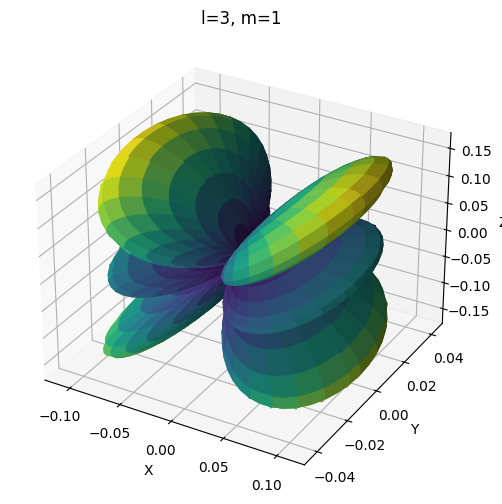

In [8]:
figura = plt.figure(figsize=(8, 6))
eixo = figura.add_subplot(111, projection='3d')
if m == 0 and l == 0:
    eixo.plot_surface(x, y, z)
else:
    eixo.plot_surface(x, y, z,  facecolors=plt.cm.viridis((r - r.min()) / (r.max() - r.min())))
eixo.set_xlabel("X")
eixo.set_ylabel("Y")
eixo.set_zlabel("Z")
eixo.set_title(f"l={l}, m={m}")

plt.show()